In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/git/scikit-exercises

Mounted at /content/gdrive
/content/gdrive/MyDrive/git/scikit-exercises


In [2]:
import numpy as np
import sympy
import PIL.Image
import torch
import scipy
import matplotlib.pyplot as plt
import sklearn
from maclass import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


importation de /content/gdrive/MyDrive/git/scikit-exercises/maclass.py


localiser le fichier maclass.py

In [3]:
from maclass import *

modifiez le et vérifiez que la nouvelle version est rechargée à chaque évaluation

In [4]:
# on cree une matrcie de nombres aleatoires 
# de 7 rangées et 5 colonnes
x = np.random.randint(10, size=(7,5))
v = np.ones((5,1))
print(x)
print(x + x * 2)
print(x.shape, v.shape)

[[6 6 9 3 1]
 [6 4 1 7 0]
 [2 4 7 3 6]
 [8 4 9 9 1]
 [0 0 6 0 1]
 [9 2 9 9 3]
 [1 8 8 6 0]]
[[18 18 27  9  3]
 [18 12  3 21  0]
 [ 6 12 21  9 18]
 [24 12 27 27  3]
 [ 0  0 18  0  3]
 [27  6 27 27  9]
 [ 3 24 24 18  0]]
(7, 5) (5, 1)


In [5]:
# multiplication de matrices, 
# verification des dimensions
x @ v
x.shape, v.shape,(x @ v).shape

((7, 5), (5, 1), (7, 1))

broadcasting

In [6]:
x + np.ones((1,7)).T.astype(int)

array([[ 7,  7, 10,  4,  2],
       [ 7,  5,  2,  8,  1],
       [ 3,  5,  8,  4,  7],
       [ 9,  5, 10, 10,  2],
       [ 1,  1,  7,  1,  2],
       [10,  3, 10, 10,  4],
       [ 2,  9,  9,  7,  1]])

einsum("ij,uv->j", x, y)

la somme des produits s'applique sur les indices { i, j, u, v } - { j }
i,j,u,v sont en partie gauche de la fleche et j est en partie droite  
$\sum_{i,u,v}{x_{i} * y_{u,v}}$

le resultat a la dimension correspondant au nombre d'indice de la partie droite

In [7]:
np.einsum("ij,uv->j", x, x)
print(np.einsum("ij->j",x))

[32 28 49 37 12]


normalization

In [8]:
x.mean(axis=0)

array([4.57142857, 4.        , 7.        , 5.28571429, 1.71428571])

In [9]:
x.std()

3.237030637318525

(array([5., 5., 2., 3., 3., 0., 6., 2., 3., 6.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

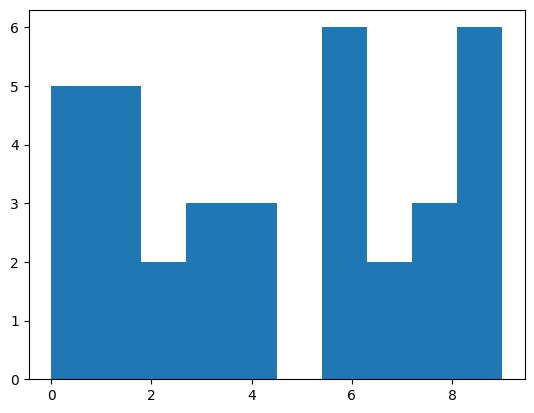

In [10]:
plt.hist(x.flatten())

<ipython-input-11-20ade0732898>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face().copy()


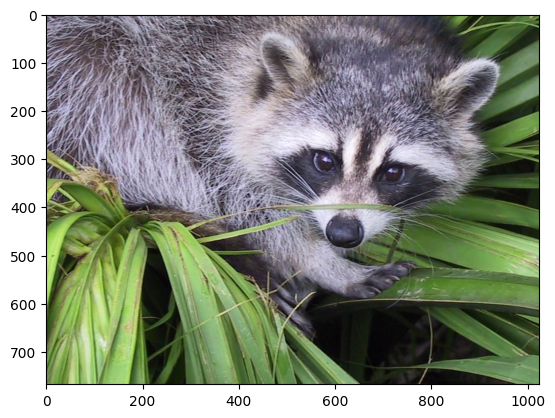

(array([206288., 213283., 299211., 348329., 373382., 315135., 277919.,
        189636., 114135.,  21978.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

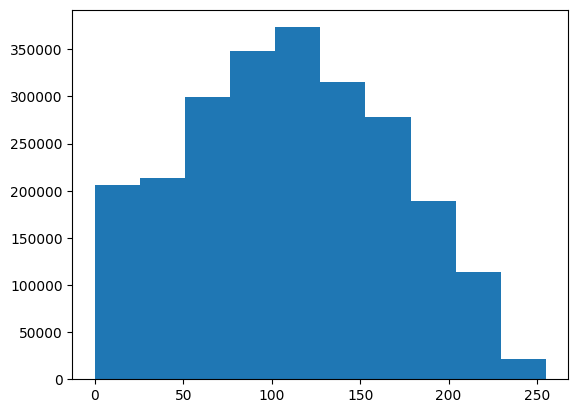

In [11]:
from scipy import misc
import imageio
f = misc.face().copy()
g = f.copy()
imageio.imsave('face.png', f) # uses the Image module (PIL)
plt.imshow(f); plt.show()
plt.hist(f.flatten())

In [12]:
# les pixels de l'image sont en entiers
f.dtype

dtype('uint8')

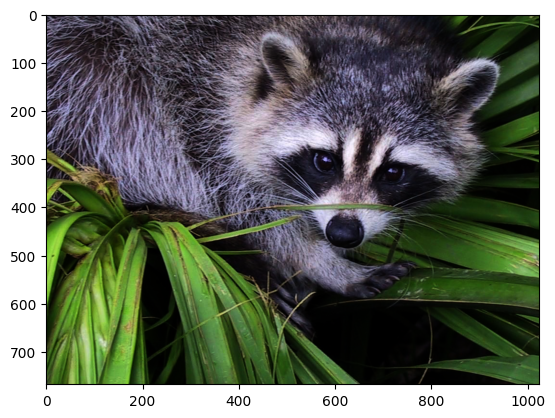

In [13]:
# quand la matrice est convertie en flottant, 
# l'intervalle des valeurs des pixels est entre 0 et 1 ( et non pas entre 0 et 255)
plt.imshow(((f / 255)**1.8)); plt.show()

In [14]:
print((f < 128).shape)
print((f < 128)[:,:,0].shape)
f[(f < 128)[:,:, 0]] = (200,0,0)

(768, 1024, 3)
(768, 1024)


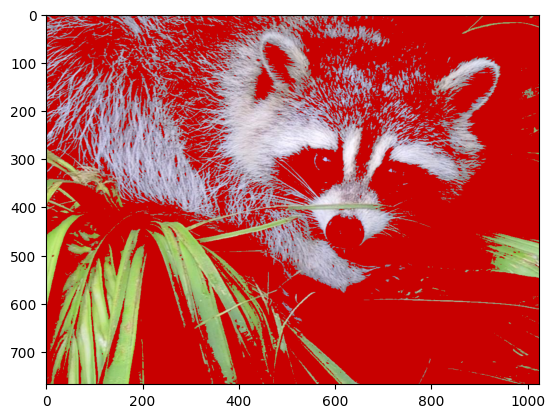

In [15]:
plt.imshow(f); plt.show()

In [16]:
g.mean(), np.max(g),  np.min(g), np.median(g.flatten())

(110.16274388631184, 255, 0, 109.0)

In [17]:
x = np.linspace(0, 10, 200)

In [18]:
y = np.sin(x)


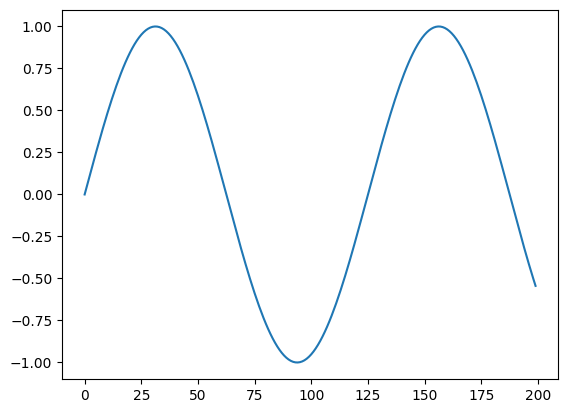

In [19]:
plt.plot(y)

In [20]:
K = 1000
x = np.random.normal(size=(K,K))
tx = torch.tensor(x)
# sur cpu ce calcul prend ~1ms 
%timeit (x@x)

61.9 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%timeit (tx@tx)

66.8 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


=> changer le runtime de cpu a gpu et comparer le temps de calcul
on voir que $ t_{gpu} = t_{cpu} / 10$


In [22]:
# pour cela => Runtime / change runtime 
tx = tx.cuda()
%timeit (tx*tx)

94.2 µs ± 21.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
z = np.random.normal(0, 1, size=(1000, 2))
zx, zy = z[:,0], z[:,1]
plt.scatter(zx, zy)

calcul symbolique en python

In [24]:
# calcul symbolique avec sympy
x,y,z = sympy.symbols('x,y,z')

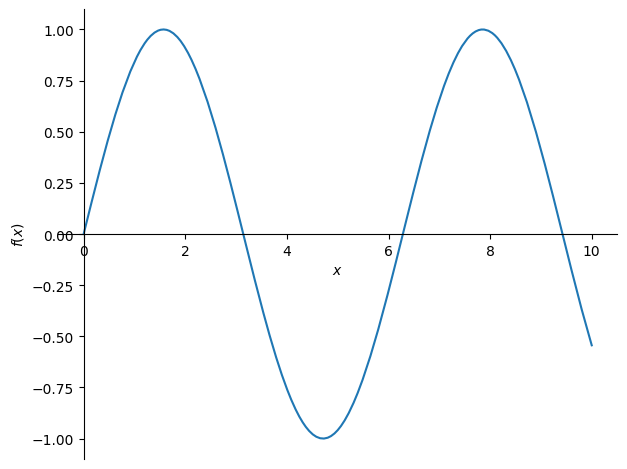

In [25]:
sympy.plot(sympy.sin(x), (x, 0,10))

In [26]:
sympy.diff(sympy.sin(x**2), x)

2*x*cos(x**2)

=> dérivez symboliquement des fonctions plus compliquées
=> utiliser integrate pour faire l'intégration 

In [ ]:
import numpy as np
x = np.random.normal(size=1000)

In [ ]:
np.std(x)

In [ ]:
x = np.random.normal(size=(100000, 10))
print(x.mean(axis=1).shape)
print(x.mean(axis=0))

In [ ]:
np.std(x.std(axis=1)), np.std(x.mean(axis=0))